<a href="https://colab.research.google.com/github/tunnexadeyemi/AW-Sales-Analysis/blob/main/Health_Care_AnalysisML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required liabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '/content/unclean_smartwatch_health_data.csv'

In [ ]:
# read file path
df = pd.read_csv(file_path)

In [ ]:
# View top 10 data
df.head(10)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
5,2095.0,96.285938,94.202910,10205.992256,8.378342673824589,Highly_Active,10
6,4772.0,47.272257,95.389760,3208.781177,7.871146008904113,Seddentary,2
7,4092.0,81.733497,95.981343,6051.249857,5.224139066195455,Sedentary,1
8,3979.0,93.340338,97.218945,1775.029578,5.468413771417153,Seddentary,1
9,3169.0,51.409967,97.272787,7940.021452,7.9544989905339145,Seddentary,8


In [ ]:
# check data type and columns
df.dtypes

,0
User ID,float64
Heart Rate (BPM),float64
Blood Oxygen Level (%),float64
Step Count,float64
Sleep Duration (hours),object
Activity Level,object
Stress Level,object


In [ ]:
# covert all columns to numeric datatype
#df = df.apply(pd.to_numeric, errors='coerce')

columns_to_convert = ['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
#check datatype to ensure the changes have been made
df.dtypes

,0
User ID,float64
Heart Rate (BPM),float64
Blood Oxygen Level (%),float64
Step Count,float64
Sleep Duration (hours),float64
Activity Level,object
Stress Level,float64


In [ ]:
  # checking unquie values in Activity Level column
df['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

In [ ]:
# repace the values in Activity Level column

value_mapping = {
    "Highly_Active": "Highly Active",
    "Actve": "Active",
    "Seddentary": "Sedentary"
}

df['Activity Level'] = df['Activity Level'].replace(value_mapping)

In [ ]:
# check dataframe
df.head(10)
  # checking unquie values in Activity Level column
df['Activity Level'].unique()

array(['Highly Active', 'Active', 'Sedentary', nan], dtype=object)

In [ ]:
#sum of mssing values in each column
df.isnull().sum()

,0
User ID,201
Heart Rate (BPM),400
Blood Oxygen Level (%),300
Step Count,100
Sleep Duration (hours),397
Activity Level,200
Stress Level,249


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    397
Activity Level            200
Stress Level              249
dtype: int64

Percentage of Missing Data:
 User ID                   2.01
Heart Rate (BPM)          4.00
Blood Oxygen Level (%)    3.00
Step Count                1.00
Sleep Duration (hours)    3.97
Activity Level            2.00
Stress Level              2.49
dtype: float64


In [ ]:
#drop missing values
df_clean = df.dropna()
# Check for missing values
missing_values = df_clean.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df_clean)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 User ID                   0
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64

Percentage of Missing Data:
 User ID                   0.0
Heart Rate (BPM)          0.0
Blood Oxygen Level (%)    0.0
Step Count                0.0
Sleep Duration (hours)    0.0
Activity Level            0.0
Stress Level              0.0
dtype: float64


In [ ]:
# compare the total number of rows before and after removing missing vlaues

print("Total number of rows before removing missing values:", len(df))
print("Total number of rows after removing missing values:", len(df_clean))

Total number of rows before removing missing values: 10000
Total number of rows after removing missing values: 8287


In [ ]:
df_clean.head(10)

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167236,Highly Active,1.0
3,2294.0,40.000000,96.894213,13797.338044,7.367790,Active,3.0
5,2095.0,96.285938,94.202910,10205.992256,8.378343,Highly Active,10.0
6,4772.0,47.272257,95.389760,3208.781177,7.871146,Sedentary,2.0
7,4092.0,81.733497,95.981343,6051.249857,5.224139,Sedentary,1.0
8,3979.0,93.340338,97.218945,1775.029578,5.468414,Sedentary,1.0
9,3169.0,51.409967,97.272787,7940.021452,7.954499,Sedentary,8.0
11,2238.0,73.852941,95.399440,1748.197069,4.830162,Active,1.0
12,1330.0,95.372290,99.152652,6155.837342,5.814348,Highly Active,10.0
14,3135.0,68.090203,99.729740,8124.135791,6.444870,Highly Active,5.0


In [ ]:
#check unique values in Activity level
df_clean['Activity Level'].unique()

array(['Highly Active', 'Active', 'Sedentary'], dtype=object)

In [ ]:
# craete a derived column (feature enginering-One-Hot-Encoding)
# repace the values in Activity Level column

value_mapping = {
    "Highly Active": "3",
    "Active": "2",
    "Sedentary":"1"
}

df_clean['Activity Level'] = df_clean['Activity Level'].replace(value_mapping)

<ipython-input-17-4ed4aecea44d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Activity Level'] = df_clean['Activity Level'].replace(value_mapping)


In [ ]:
df_clean.head(10)
df_clean['Activity Level'].unique()
df_clean.dtypes

,0
User ID,float64
Heart Rate (BPM),float64
Blood Oxygen Level (%),float64
Step Count,float64
Sleep Duration (hours),float64
Activity Level,object
Stress Level,float64


In [ ]:
# set activity level to numeric
df_clean['Activity Level'] = pd.to_numeric(df_clean['Activity Level'], errors='coerce')
# set Stress Level from float to numeric type (int)
df_clean['Stress Level'] = df_clean['Stress Level'].astype(int)
# set User ID from float to numeric type (int)
df_clean['User ID'] = df_clean['User ID'].astype(int)


<ipython-input-19-5c99fd6fb02a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Activity Level'] = pd.to_numeric(df_clean['Activity Level'], errors='coerce')
<ipython-input-19-5c99fd6fb02a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Stress Level'] = df_clean['Stress Level'].astype(int)
<ipython-input-19-5c99fd6fb02a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
df_clean['Heart Rate (BPM)'] = df_clean['Heart Rate (BPM)'].round(2)
df_clean['Blood Oxygen Level (%)'] = df_clean['Blood Oxygen Level (%)'].round(2)
df_clean['Sleep Duration (hours)'] = df_clean['Sleep Duration (hours)'].round(2)
df_clean['Step Count'] = df_clean['Step Count'].round(2)


<ipython-input-20-bd9fc4f4c54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Heart Rate (BPM)'] = df_clean['Heart Rate (BPM)'].round(2)
<ipython-input-20-bd9fc4f4c54f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Blood Oxygen Level (%)'] = df_clean['Blood Oxygen Level (%)'].round(2)
<ipython-input-20-bd9fc4f4c54f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
df_clean.head(10)
#df_clean.dtypes

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174,58.94,98.81,5450.39,7.17,3,1
3,2294,40.00,96.89,13797.34,7.37,2,3
5,2095,96.29,94.20,10205.99,8.38,3,10
6,4772,47.27,95.39,3208.78,7.87,1,2
7,4092,81.73,95.98,6051.25,5.22,1,1
8,3979,93.34,97.22,1775.03,5.47,1,1
9,3169,51.41,97.27,7940.02,7.95,1,8
11,2238,73.85,95.40,1748.20,4.83,2,1
12,1330,95.37,99.15,6155.84,5.81,3,10
14,3135,68.09,99.73,8124.14,6.44,3,5


In [ ]:
#summary statstics
df_clean.describe()
pd.options.display.float_format = '{:.2f}'.format
df_clean.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
count,8287.00,8287.00,8287.00,8287.00,8287.00,8287.00,8287.00
mean,3008.31,76.00,97.84,6996.28,6.50,1.99,5.43
std,1152.85,19.03,1.74,6904.77,1.51,0.82,2.87
min,1001.00,40.00,90.79,0.91,-0.19,1.00,1.00
25%,1998.50,64.92,96.65,1994.65,5.48,1.00,3.00
50%,3006.00,75.32,98.00,4970.88,6.50,2.00,5.00
75%,4005.00,85.32,99.38,9765.36,7.53,3.00,8.00
max,4999.00,292.92,100.00,62486.69,12.14,3.00,10.00


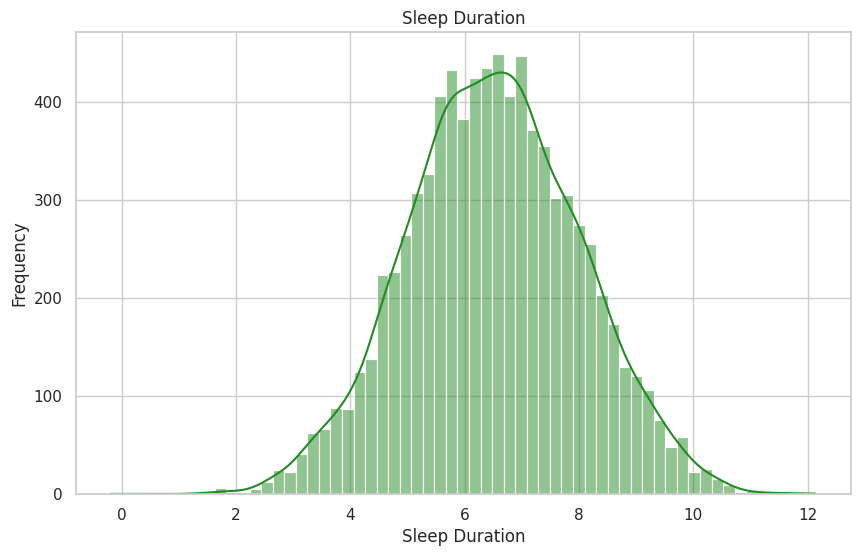

In [ ]:
# distribution of sleep duration(frequecy of sleep)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Sleep Duration (hours)'], color='forestgreen', kde=True)
plt.title('Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()

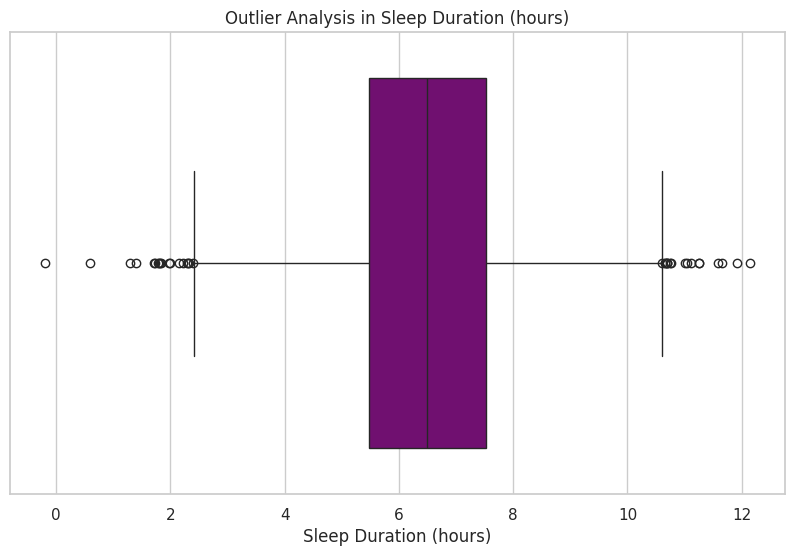

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Sleep Duration (hours)'], color='purple')
plt.title('Outlier Analysis in Sleep Duration (hours)')
plt.xlabel('Sleep Duration (hours)')
plt.show()

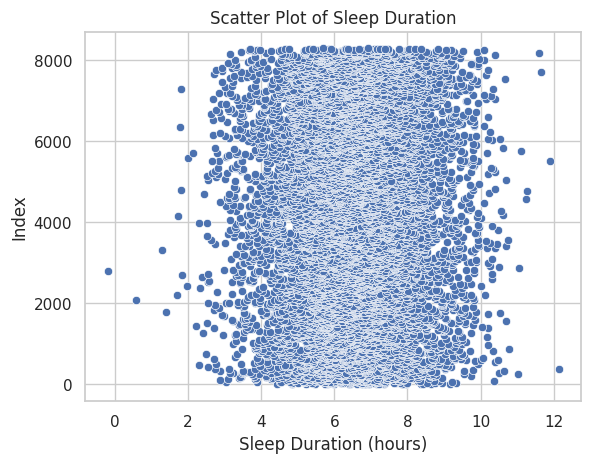

In [ ]:
# checkng outliers

# Assuming df_clean is your DataFrame
sleep_duration = df_clean['Sleep Duration (hours)']

# Create an index for the y-axis
index = range(len(sleep_duration))

# Create the scatter plot
sns.scatterplot(x=sleep_duration, y=index)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Index')
plt.title('Scatter Plot of Sleep Duration')
plt.show()


In [ ]:
#remove the outliers using IQR
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = df_clean['Sleep Duration (hours)'].quantile(0.25)
print(Q1)
Q3 = df_clean['Sleep Duration (hours)'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = df_clean[(df_clean['Sleep Duration (hours)'] >= lower_bound) & (df_clean['Sleep Duration (hours)'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", df_clean.shape)
print("New data shape without outliers:", data_no_outliers.shape)



5.48
7.53
Original data shape: (8287, 7)
New data shape without outliers: (8252, 7)


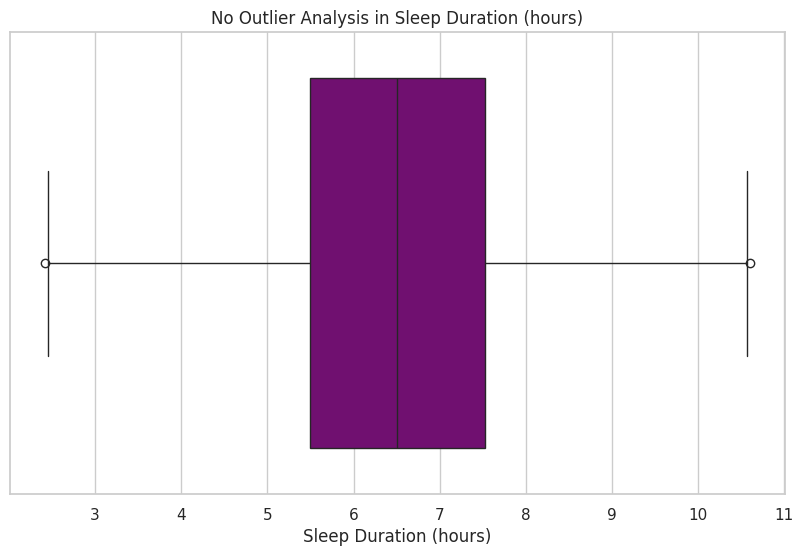

In [ ]:
# re-checking for outliners using box-plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['Sleep Duration (hours)'], color='purple')
plt.title('No Outlier Analysis in Sleep Duration (hours)')
plt.xlabel('Sleep Duration (hours)')
plt.show()


In [ ]:
#summary stat outliners removed
data_no_outliers.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
count,8252.00,8252.00,8252.00,8252.00,8252.00,8252.00,8252.00
mean,3008.33,75.99,97.83,7002.73,6.51,1.99,5.43
std,1152.84,19.05,1.74,6914.48,1.48,0.82,2.87
min,1001.00,40.00,90.79,0.91,2.42,1.00,1.00
25%,1999.75,64.92,96.65,1992.63,5.49,1.00,3.00
50%,3006.00,75.31,98.00,4976.99,6.50,2.00,5.00
75%,4005.00,85.30,99.38,9796.79,7.53,3.00,8.00
max,4999.00,292.92,100.00,62486.69,10.60,3.00,10.00


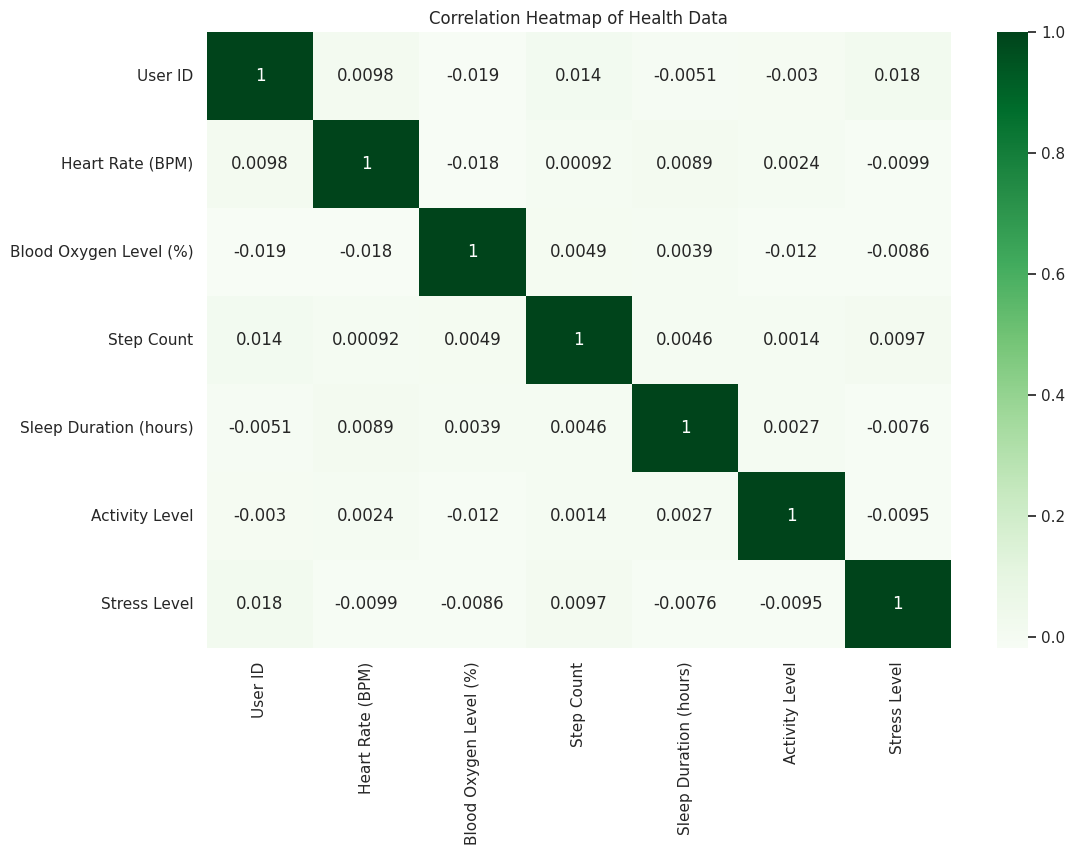

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Health Data')
plt.show()

In [ ]:
data_no_outliers.columns

Index(['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count',
       'Sleep Duration (hours)', 'Activity Level', 'Stress Level'],
      dtype='object')

In [ ]:
# Splitting the Data into Train/Test

X = data_no_outliers.drop(columns=['Sleep Duration (hours)'])
y = data_no_outliers['Sleep Duration (hours)']


# Define your features (independent variables) and target (dependent variable)
features = ['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count',
       'Sleep Duration (hours)', 'Activity Level']
target = ['Stress Level']

X = data_no_outliers[features]
y = data_no_outliers[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 6601 samples
Test set size: 1651 samples


In [ ]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const


,const,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level
3265,1.00,1947,63.68,96.66,2596.15,6.97,3
2404,1.00,4234,52.73,97.51,5198.40,6.08,2
4743,1.00,3248,68.35,100.00,1957.27,9.34,3
3839,1.00,2528,88.28,96.53,5109.09,4.60,2
6696,1.00,2231,84.64,96.33,1466.81,6.79,1
...,...,...,...,...,...,...,...
324,1.00,1608,94.06,97.52,6863.65,7.49,2
948,1.00,2353,74.62,100.00,263.46,6.39,1
5193,1.00,4237,106.29,94.93,4051.30,7.00,1
3384,1.00,2508,79.11,97.24,3733.28,7.76,2


In [ ]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           Stress Level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.084
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.369
Time:                        03:50:53   Log-Likelihood:                -16327.
No. Observations:                6601   AIC:                         3.267e+04
Df Residuals:                    6594   BIC:                         3.271e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

In [ ]:
#Prediction/Testing
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

,0
7133,5.57
9614,5.49
5148,5.41
330,5.57
6425,5.24
...,...
4056,5.49
2517,5.51
7745,5.46
505,5.46


In [ ]:
#Checking OLS Assumtions
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()
